## Medal Percentage Analysis

In this analysis, we will be calculating the percentage of medals (gold, silver and bronze) for each country and each year. We are also plotting the appropriate graphs in order to better visualize our analysis. This analysis can be used to understand the percentage of medals won by a country in a particular year or overall.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Loading the Asian Games medal list dataset.

df_asian = pd.read_csv("Medal_List_Asian.csv")

In [3]:
##Truncating the '.0' from the years column. (converting 2018.0 to 2018)

df_asian["Year"] = [int(x) for x in df_asian["Year"].tolist()]
df_asian = df_asian.astype({"Year":object})
df_asian.rename(columns = {"Nation":"Country"},inplace=True)

In [4]:
##Earlier china was know as "Republic of china" and sri lanka was known as "Ceylon", hence changing their names as per the new 
##conventions.

df_asian.replace("Republic of China","China",inplace=True)
df_asian.replace("Ceylon","Sri Lanka",inplace=True)
df_asian.replace("Field hockey","Hockey",inplace=True)

In [5]:
##Loading the Olympics games medal list dataset.

df_oly = pd.read_csv("Medal_List_Olympics.csv")
df_oly.replace("Field hockey","Hockey",inplace=True)

In [6]:
## This is the block of code in which i am calculating the percentage of medals won by the asian counties in both "Asian" and 
##"Olympic" games.
##This is the helper funtion that will take the inputs as game : which game to analyze, country: which country to provide the
##analysis for and year: which year to consider for analysis.

def Helper2(game_df,country,year):
    
    li3=[]
    df_y = game_df[game_df["Year"] == year]  ##Filtering the dataframe according to the year passed by the user.
    countries = df_y["Country"].unique().tolist()
    for nation in countries:   ##For every country i am calculating the percentage of gold,silver,bronze seperately and also percentage of total medals won.
        df_c = df_y[df_y["Country"] == nation]
        li3.append((nation,year,float(format((df_c["Gold"].sum()/df_y["Gold"].sum())*100,'0.2f')),float(format((df_c["Silver"].sum()/df_y["Silver"].sum())*100,'0.2f')),float(format((df_c["Bronze"].sum()/df_y["Bronze"].sum())*100,'0.2f')),float(format((df_c["Total"].sum()/df_y["Total"].sum())*100,'0.2f'))))
        li3.sort(key = lambda x : x[2],reverse=True)
    ans3_df = pd.DataFrame(li3,columns=["Country","Year","% Gold","% Silver","% Bronze","% Total"])
    
    ##Here i am considering all the years.
    li4=[]
    countries = game_df["Country"].unique().tolist()
    for nation in countries:  ##For every country i am calculating the percentage of gold,silver,bronze seperately and also percentage of total medals won.
        df_c = game_df[game_df["Country"] == nation]
        li4.append((nation,float(format((df_c["Gold"].sum()/game_df["Gold"].sum())*100,'0.2f')),float(format((df_c["Silver"].sum()/game_df["Silver"].sum())*100,'0.2f')),float(format((df_c["Bronze"].sum()/game_df["Bronze"].sum())*100,'0.2f')),float(format((df_c["Total"].sum()/game_df["Total"].sum())*100,'0.2f'))))
        li4.sort(key = lambda x : x[1],reverse=True)
    ans4_df = pd.DataFrame(li4,columns=["Country","% Gold","% Silver","% Bronze","% Total"])
    


    if(country == "Overall" and year == "Overall"):
    ##Plotting the graph and returning the dataframe if the user has asked the analysis for all the countries.
    
        b=[]
        for i in ans4_df["% Total"].values[:5]:
            b.append(i)
        b.append(ans4_df["% Total"].values[5:].sum())
        labels=[]
        for l in ans4_df["Country"].values[:5]:
            labels.append(l)
        labels.append("Others")
        plt.pie(b,labels=labels,autopct='%0.2f%%',radius=2)
        return (ans4_df,plt)
    
    elif(country == "Overall" and year != "Overall"):
    ##Plotting the graph and returning the dataframe if the user has asked the analysis for all the countries and a particular year.


        b=[]
        for i in ans3_df["% Total"].values[:5]:
            b.append(i)
        b.append(ans3_df["% Total"].values[5:].sum())
        labels=[]
        for l in ans3_df["Country"].values[:5]:
            labels.append(l)
        labels.append("Others")
        plt.pie(b,labels=labels,autopct='%0.2f%%',radius=2)
        return (ans3_df,plt)
    
    elif(country != "Overall" and year == "Overall"):
    ##returning the dataframe if the user has asked the analysis for a particular country and all years.
        return ans4_df[ans4_df["Country"] == country]
    
    elif(country != "Overall" and year != "Overall"):
    ##returning the dataframe if the user has asked the analysis for a particular country and a particular year.
        return ans3_df[ans3_df["Country"] == country]
    
def Medal_percentage(game,country,year):  ##This is the main function that will be called as soon as the user inputs something.
    
    if(game == "Asian"):  ##If the user wants the analysis for asian games then we call the helper function by proving it with asian games dataset.
        return Helper2(df_asian.copy(),country,year)
    elif(game == "Olympics"):  ##If the user wants the analysis for olympic games then we call the helper function by proving it with olympic games dataset.
        return Helper2(df_oly.copy(),country,year)
    else:  ##In this case the helper function will be called twice first for asian games and then for olympic games.
        return (Helper2(df_asian.copy(),country,year),Helper2(df_oly.copy(),country,year))

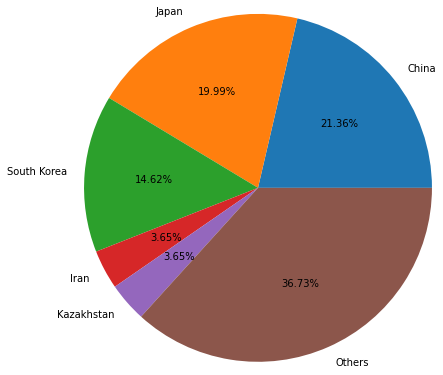

In [7]:
df,fig=Medal_percentage("Asian","Overall","Overall")

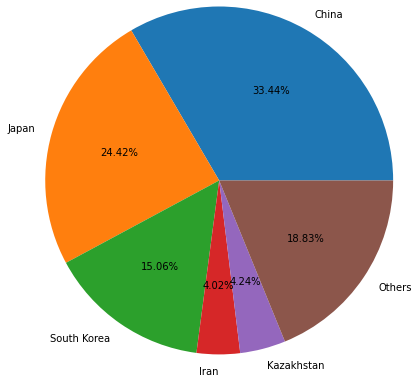

In [8]:
df,fig = Medal_percentage("Olympics","Overall","Overall")

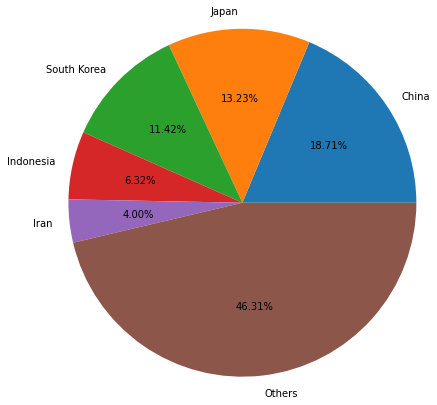

In [9]:
df,fig = Medal_percentage("Asian","Overall",2018)

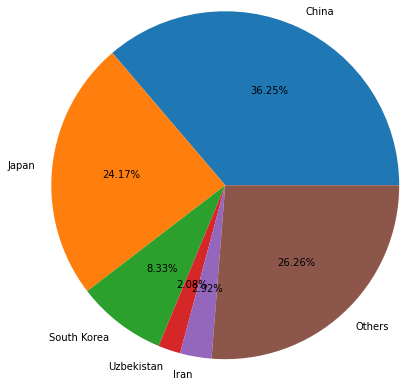

In [10]:
df,fig = Medal_percentage("Olympics","Overall",2020)